# COVID19 Dataset EDA
In this notebook we will explore COVID data from the past three years with a focus on the US.

Covid data sources: JHU COVID19 Data and [Our World in Data](https://ourworldindata.org)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data import

In [ ]:
# Source: JHU
covid19_20 = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US-Covid-Cases-2020.csv')
covid19_21 = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US-Covid-Cases-2021.csv')
covid19_22 = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US-Covid-Cases-2022.csv')
covid19_23 = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US-Covid-Cases-2023.csv')

# US Census
us_pop = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US_Population_By_State_2019.csv')

# US Covid-19 Vaccination - Source: https://ourworldindata.org
us_vax = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/us_state_vaccinations.csv')

# US State abbreviations
abbrevs = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/state-abbrevs.csv')

Combining covid datasets:

Check the `info()`

## Data cleaning
1. Drop rows with missing values for `fips`. This will ensure we work with data at the county level
2. convert `date` column to datetime format using the format `'%Y-%m-%d'` (use `to_datetime` from `pandas`)
3. Convert `fips` to `int`
4. rename the columns to `['state', 'county', 'date', 'confirmed', 'deaths']`
5. Sort the rows based on `['date', 'state', 'county']`

Check `info()` and `describe()`

Date range

confirmed column is a cumulative sum - so the total sum gives us the incorrect total. Check that:

## Exploration

### Checking the most recent date

Now check the total confirmed:

Per state:

Make a bar chart:

### Last 7 days
Get the new cases in the past 7 days. You might need to use `from datetime import timedelta`.

In [ ]:
covid19.date.max()

Timestamp('2023-02-09 00:00:00')

,state,county,confirmed_0,deaths_0,confirmed_7,deaths_7,confirmed,deaths
0,Alabama,1001,19630,230.0,19530,230.0,100,0.0
1,Alabama,1003,69344,723.0,69187,723.0,157,0.0
2,Alabama,1005,7387,103.0,7339,103.0,48,0.0
3,Alabama,1007,8012,109.0,7967,109.0,45,0.0
4,Alabama,1009,18488,261.0,18349,261.0,139,0.0


In [ ]:
covid_last_7_days = merged_df[['state', 'county', 'confirmed', 'deaths']]
covid_last_7_days.head(2)

,state,county,confirmed,deaths
0,Alabama,1001,100,0.0
1,Alabama,1003,157,0.0


Bar chart:

In [ ]:
us_pop.head()

,STATE,POPULATION
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [ ]:
us_pop

,STATE,POPULATION
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223
5,Colorado,5758736
6,Connecticut,3565287
7,Delaware,973764
8,District of Columbia,705749
9,Florida,21477737


,state,confirmed,deaths,POPULATION
0,Alabama,9820,10.0,4903185
1,Alaska,692,0.0,731545


Per million:

Bar chart:

### Vaccination
Any relationship between vaccination and COVID-19 infection?

In [ ]:
us_vax.head(5)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [ ]:
us_vax.date.max()

'2023-01-11'

In [ ]:
df_7 = df_7.merge(us_vax)
df_7.head()

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m,vax_rate
0,South Carolina,11527,237.0,5148714,2238.811478,46.030912,59.76
1,Alabama,9820,10.0,4903185,2002.779826,2.039491,53.06
2,Oklahoma,7819,115.0,3956971,1976.006395,29.062634,60.33
3,Wyoming,1078,15.0,578759,1862.606024,25.917524,52.97
4,Tennessee,10249,79.0,6829174,1500.767150,11.568017,56.19


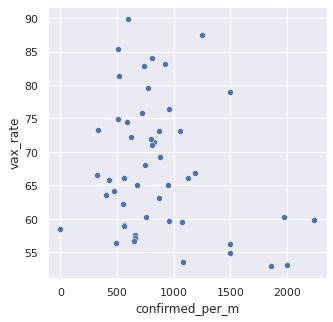

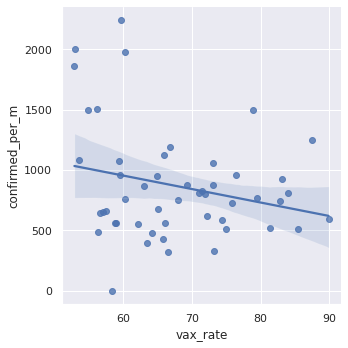

Correlation:

-0.24133827626909385

In [ ]:
# Install and import the package
!pip install plotly_express -q
import plotly_express as px

In [ ]:
fig = px.scatter(df_7, x="confirmed_per_m", y="vax_rate", color="state")
fig.show()

In [ ]:
abbrevs.head(1)

,state,abbreviation
0,Alabama,AL


In [ ]:
df_7 = df_7.merge(abbrevs)
df_7.head(1)

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m,vax_rate,abbreviation
0,South Carolina,11527,237.0,5148714,2238.811478,46.030912,59.76,SC


In [ ]:
import plotly.express as px

px.scatter_geo(df_7, 
               locations='abbreviation', 
               locationmode='USA-states',
               color='confirmed_per_m', 
               size='vax_rate', 
               hover_name='state', 
               scope='usa'
               )

Replicating the [CDC chart](https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days).

In [ ]:
import plotly.express as px

px.choropleth(df_7, 
              locations='abbreviation', 
              color='confirmed_per_m', 
              hover_name='state', 
              scope='usa',
              locationmode='USA-states',
              color_continuous_scale='viridis'
               )

# COVID-19 Mortality

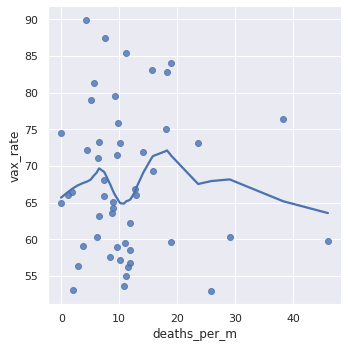

Correlation:

-0.023759481629772188